# **DAY 21: ASSIGNMENT 16 (Naive Bayes classifiers)**

# **DATE: 28 JUNE 2021**

# **AUTHOR: AAMIR P**

# **REG. ID.: GO_STP_7724**

<b>Naive Bayes classifiers are built on Bayesian classification methods. These rely on Bayes's theorem, which is an equation describing the relationship of conditional probabilities of statistical quantities.

Create a Model using Naive Bayes classifiers to predict whether a passenger on the titanic would have been survived or not.

In [ ]:
#libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#load the data
df=pd.read_csv('/content/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.shape

(891, 12)

In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


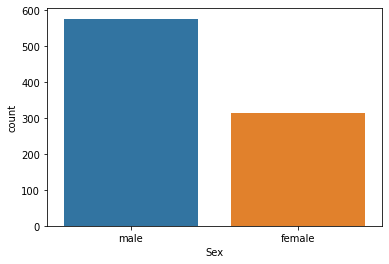

In [8]:
#Visualization
#Gender
sns.countplot(x='Sex',data=df)

(array([30., 17., 15.,  9., 29., 64., 67., 70., 83., 62., 51., 40., 35.,
        27., 35., 23., 15.,  9., 11., 11.,  4.,  2.,  3.,  1.,  1.]),
 array([ 0.42  ,  3.6032,  6.7864,  9.9696, 13.1528, 16.336 , 19.5192,
        22.7024, 25.8856, 29.0688, 32.252 , 35.4352, 38.6184, 41.8016,
        44.9848, 48.168 , 51.3512, 54.5344, 57.7176, 60.9008, 64.084 ,
        67.2672, 70.4504, 73.6336, 76.8168, 80.    ]),
 <a list of 25 Patch objects>)

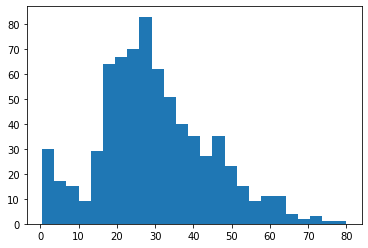

In [19]:
#Age Distribution

plt.hist(x=df['Age'],bins = 25)#The towers or bars of a histogram are called bins.

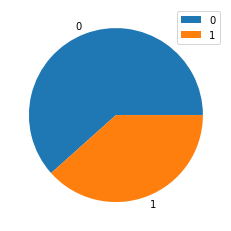

In [23]:
#Survived
y=df['Survived'].value_counts()
plt.pie(y,labels=y.index)
plt.legend()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


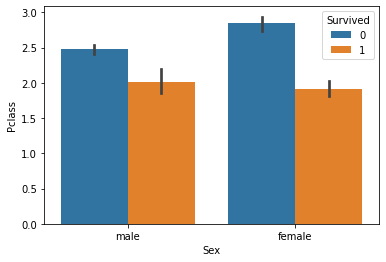

In [27]:
sns.barplot('Sex','Pclass',hue='Survived',data=df) #the hue parameter determines which column in the data frame should be used for colour encoding. 

In [30]:
#Label Encoding -replace the categorical value with a numeric value

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['Sex']= le.fit_transform(df["Sex"]) #fit_transform is used on the training data so that we can scale the training data and also learn the scaling parameters.
df["Survived"]=le.fit_transform(df['Survived'])


In [32]:
df['Sex'].unique() #Returns the sorted unique elements of an array.

array([1, 0])

In [33]:
df['Survived']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [59]:
feature = df[['PassengerId']]
target = df["Survived"]



In [60]:
#Modelling
#Divide for training and testing
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(feature, target, test_size = 0.3, random_state = 45)

In [61]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
#training
gnb = GaussianNB()
gnb.fit(xtrain, ytrain)

GaussianNB(priors=None, var_smoothing=1e-09)

In [62]:
#testing
ypred=gnb.predict(xtest)
ypred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [64]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
matrix=confusion_matrix(ytest,ypred)
matrix

array([[178,   0],
       [ 90,   0]])

In [65]:
accuracy_score = accuracy_score(ytest,ypred)
accuracy_score

0.664179104477612